# Warming stripes visualization

See https://en.wikipedia.org/wiki/Warming_stripes# for more information


In [34]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import os
import xarray as xr
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib.pyplot import figure


In [36]:
historical_file_name="./data/historical/ts_Amon_CNRM-CM6-1-HR_historical_r1i1p1f2_gr_18500116-20141216_v20191021.nc"

In [37]:
post_file_name="./data/post/ssp2_4_5/ts_Amon_CNRM-CM6-1-HR_ssp245_r1i1p1f2_gr_20150116-21001216_v20191202.nc"

In [38]:
def kelvin_to_celsius(kelvin):
    return kelvin - 273.15

In [39]:
ds = xr.open_dataset(post_file_name)
# ds

In [40]:
dsh = xr.open_dataset(historical_file_name)
# dsh

In [41]:
arr = ds.sel(lat=48.0, lon=2.0, method="nearest")
# arr

In [42]:
arr_h = dsh.sel(lat=48.0, lon=2.0, method="nearest")
# arr_h

In [43]:
all_years = xr.concat([arr_h, arr], dim="time", coords="minimal", compat="minimal")
# all_years

## Simulation Forecast

In [44]:
y = [kelvin_to_celsius(x) for x in arr["ts"].values]
x = arr["time"].values

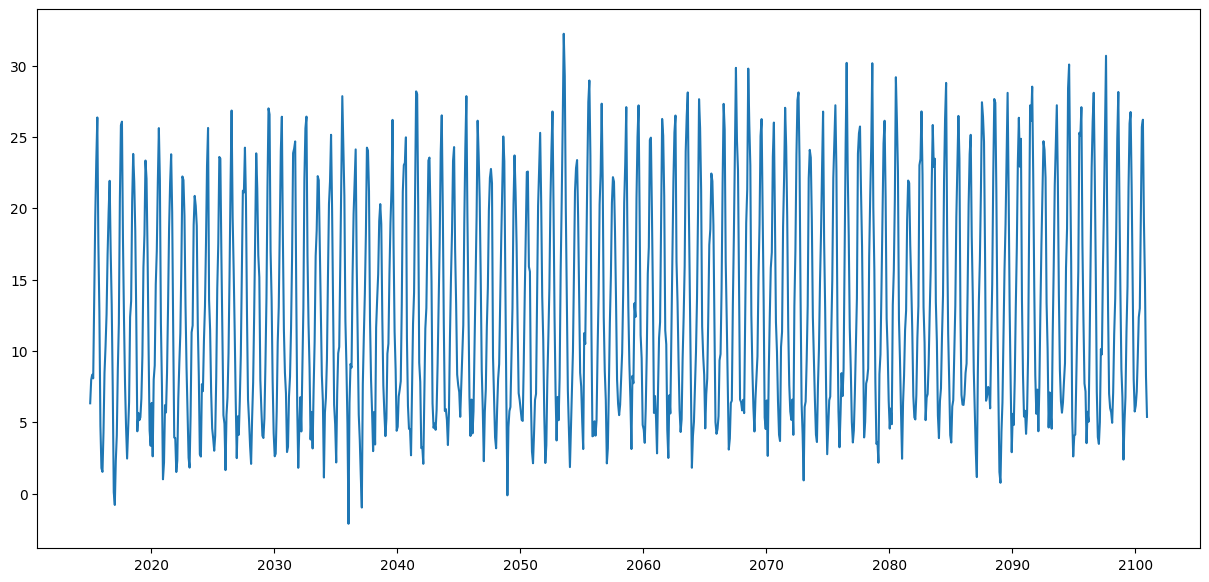

In [45]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(x, y)

In [46]:
df = pd.DataFrame(data={"date": x, "temperature": y })
s_by_year = df.groupby(df.date.dt.year)["temperature"].mean()

In [47]:
s_by_year

date
2015    12.536584
2016    11.105419
2017    11.748664
2018    12.168588
2019    11.762905
          ...    
2096    13.975587
2097    13.908283
2098    13.734829
2099    13.690302
2100    13.902200
Name: temperature, Length: 86, dtype: float64

In [48]:
s_by_year.index

Index([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026,
       2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038,
       2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050,
       2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062,
       2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074,
       2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086,
       2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098,
       2099, 2100],
      dtype='int32', name='date')

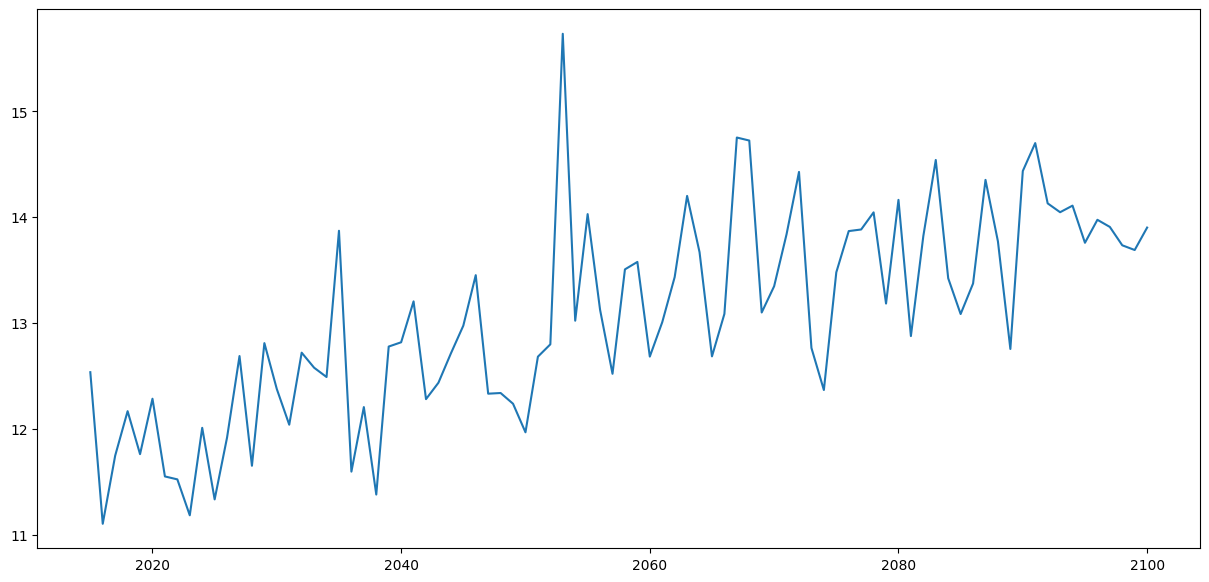

In [49]:
fig, ax = plt.subplots(figsize=(15,7))
plt.plot(s_by_year)

<BarContainer object of 86 artists>

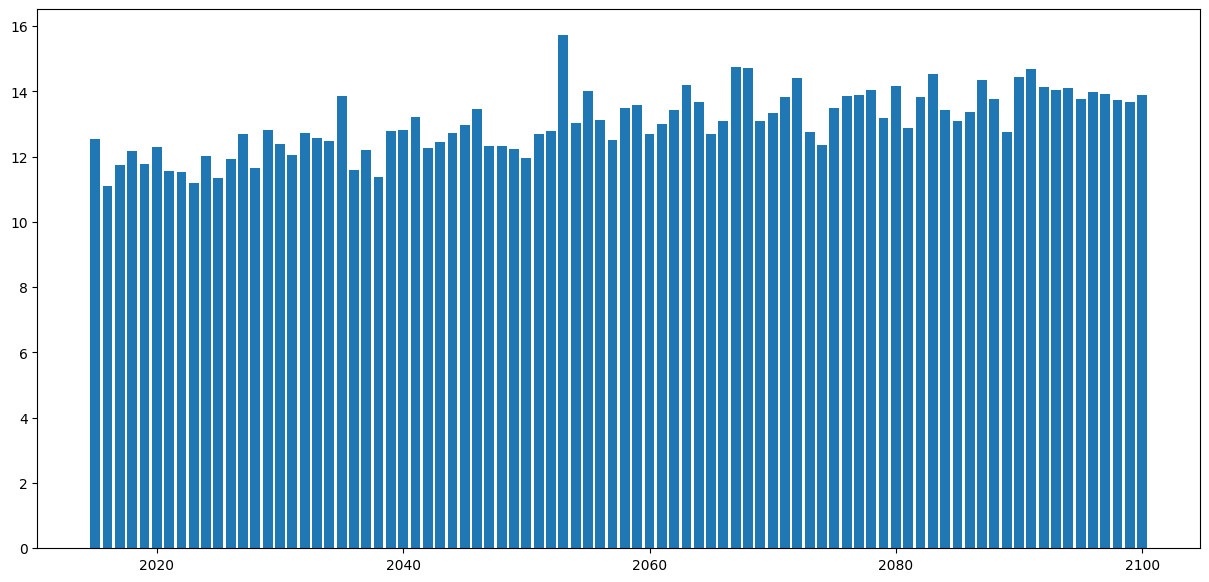

In [50]:
fig, ax = plt.subplots(figsize=(15,7))
plt.bar(s_by_year.index, s_by_year)

In [51]:
diff_by_year = s_by_year.transform(lambda x: x-12)
diff_by_year

date
2015    0.536584
2016   -0.894581
2017   -0.251336
2018    0.168588
2019   -0.237095
          ...   
2096    1.975587
2097    1.908283
2098    1.734829
2099    1.690302
2100    1.902200
Name: temperature, Length: 86, dtype: float64

In [52]:
min_diff, max_diff = (diff_by_year.min(), diff_by_year.max())

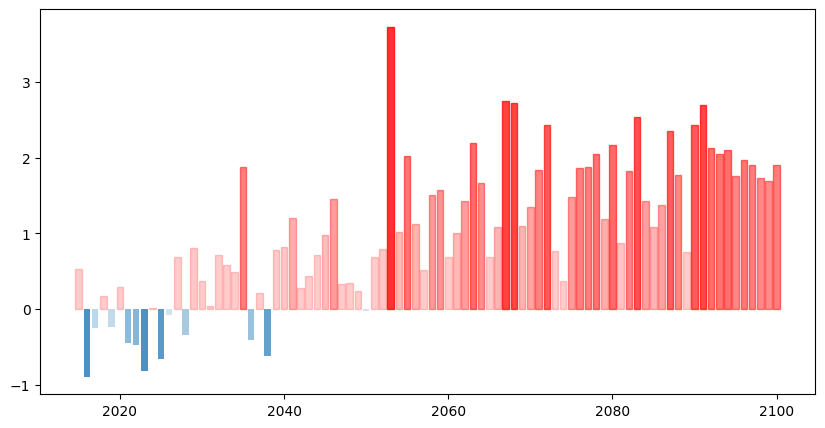

In [53]:
fig, ax = plt.subplots(figsize=(10,5))

def clip_alpha(x):
    return np.clip(x, 0.2, 0.8)

def bar_plot(df):
    ax = plt.bar(df.index, df)
    min, max = (df.min(), df.max())
    for bar, value in zip(ax, df):
        if value < 0:
            bar.set_alpha(clip_alpha(abs(value/min)))
        else:
            bar.set_color('r')
            bar.set_alpha(clip_alpha(abs(value/max)))

bar_plot(diff_by_year)

## Historical and future temperatures

In [54]:
y = [kelvin_to_celsius(x) for x in all_years["ts"].values]
x = all_years["time"].values

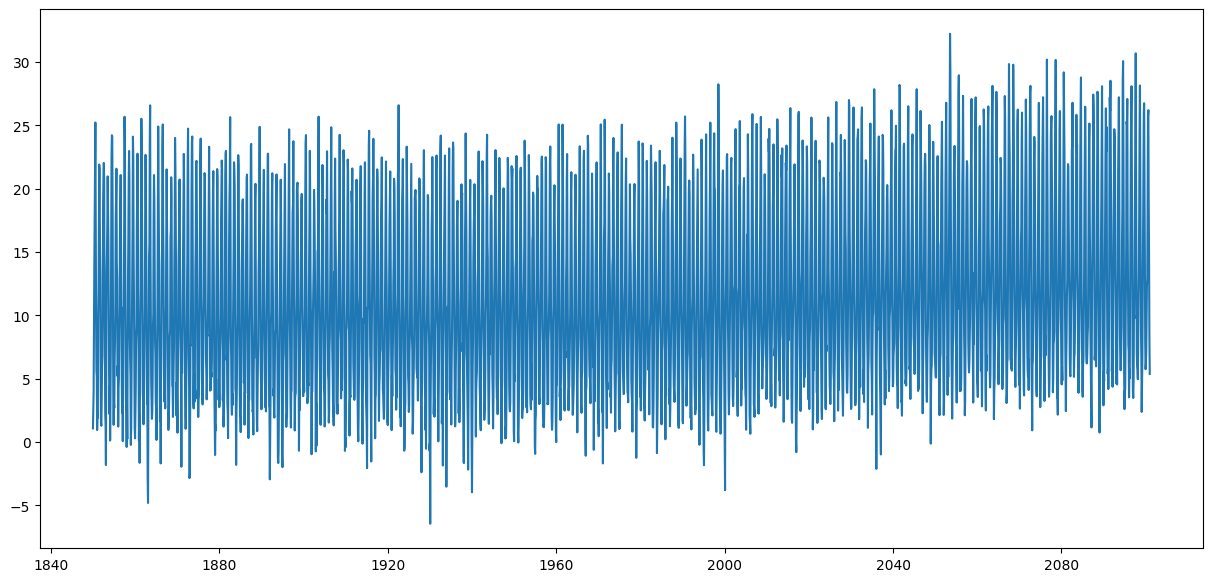

In [55]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(x, y)

In [56]:
df = pd.DataFrame(data={"date": x, "temperature": y })
s_by_year = df.groupby(df.date.dt.year)["temperature"].mean()

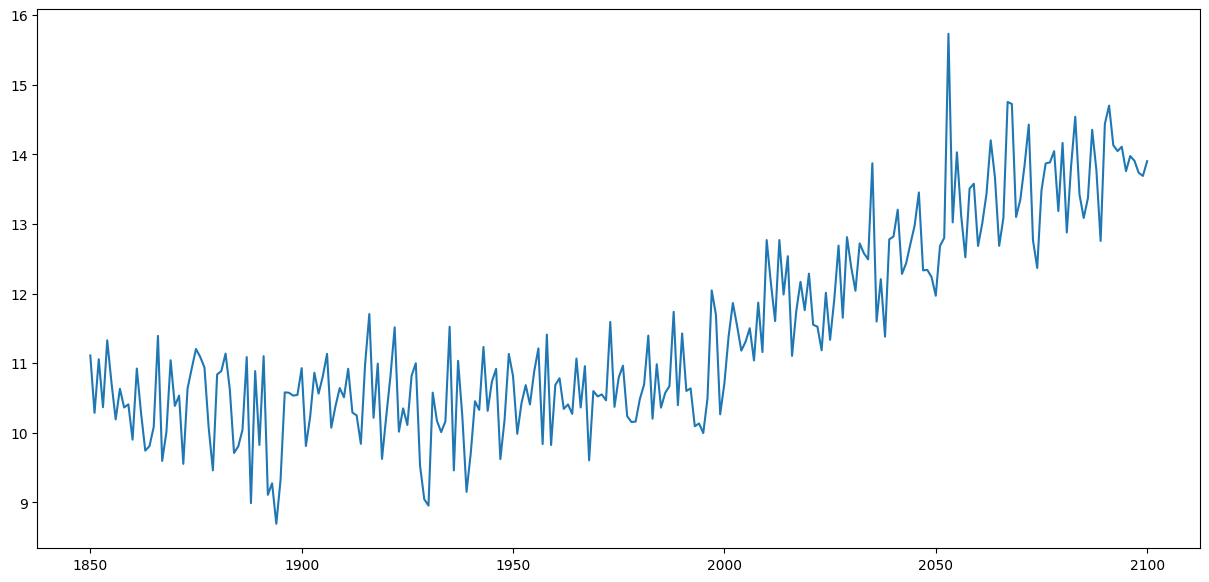

In [57]:
fig, ax = plt.subplots(figsize=(15,7))
plt.plot(s_by_year)

In [58]:
diff_by_year = s_by_year.transform(lambda x: x-11.5)

In [59]:
min_diff, max_diff = (diff_by_year.min(), diff_by_year.max())

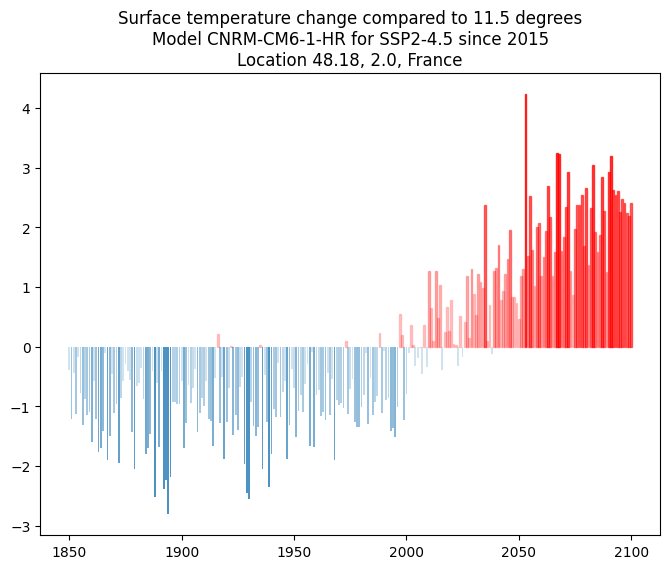

In [124]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.title("Surface temperature change compared to 11.5 degrees\nModel CNRM-CM6-1-HR for SSP2-4.5 since 2015\nLocation 48.18, 2.0, France")
bar_plot(diff_by_year)

plt.savefig("./figures/warming_stripes.png")

## Scenarios comparaison

In [109]:
files = [
    ("SSP1 2.6", "ssp1_2_6/ts_Amon_CNRM-CM6-1-HR_ssp126_r1i1p1f2_gr_20150116-21001216_v20200127.nc"),
    ("SSP2 4.5", "ssp2_4_5/ts_Amon_CNRM-CM6-1-HR_ssp245_r1i1p1f2_gr_20150116-21001216_v20191202.nc"),
    ("SSP3 7.0", "ssp3_7_0/ts_Amon_CNRM-CM6-1-HR_ssp370_r1i1p1f2_gr_20150116-21001216_v20200127.nc"),
    ("SSP5 8.5", "ssp5_8_5/ts_Amon_CNRM-CM6-1-HR_ssp585_r1i1p1f2_gr_20150116-21001216_v20191202.nc")
]

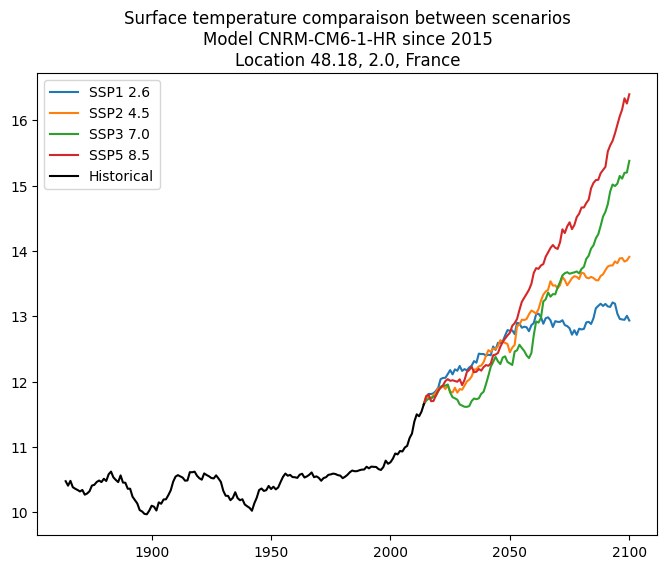

In [125]:
graphs = []

def get_df(arr):
    y = [kelvin_to_celsius(x) for x in arr["ts"].values]
    x = arr["time"].values
    df = pd.DataFrame(data={"date": x, "temperature": y })
    df = df.groupby(df.date.dt.year)["temperature"].mean().transform(lambda x: x)
    df = df.rolling(15).mean()
    return df
    
    
for file in files:
    arr = xr.open_dataset(f"data/post/{file[1]}").sel(lat=48.0, lon=2.0, method="nearest")
    arr = xr.concat([arr_h, arr], dim="time", coords="minimal", compat="minimal")
    df = get_df(arr)
    df = df[df.index >= 2014]
    graphs.append((file[0], df))

fig, ax = plt.subplots(figsize=(8, 6))
for name, df in graphs:
    ax.plot(df, label=name)

ax.plot(get_df(arr_h), color="black", label="Historical")

plt.legend(loc="upper left")

plt.title("Surface temperature comparaison between scenarios\nModel CNRM-CM6-1-HR since 2015\nLocation 48.18, 2.0, France")

plt.savefig("./figures/scenarios_comparaison.png")